# import library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as ex 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR  # for Regression
from lightgbm import LGBMRegressor
from IPython.display import display

### 📦 Libraries Used

- **NumPy** – numerical computations
- **Pandas** – data manipulation and analysis
- **Matplotlib & Seaborn** – data visualization
- **Plotly Express** – interactive visualizations
- **Scikit-learn** – preprocessing, pipelines, model training & evaluation
  - Linear, Lasso, Ridge, ElasticNet
  - KNN, Decision Tree, Random Forest, SVR
  - StandardScaler, Pipeline, RandomizedSearchCV
- **LightGBM** – gradient boosting regressor for high-performance modeling

In [2]:
def read_data(path) -> pd.DataFrame:
    d = pd.read_csv(path)
    return d

In [3]:
data = read_data(path="medical_insurance.csv")

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795


In [6]:
def shape(data:pd.DataFrame):
    print(f"row --> {df.shape[0]}")
    print(f"columns --> {df.shape[1]}")

In [7]:
shape(df)

row --> 1338
columns --> 8


In [8]:
def information(data: pd.DataFrame):
    print(data.info())
    print("_" * 80)
    df_missing_value = pd.DataFrame(
        data={
            "count missing value": data.isna().sum(),
            "Ratio of missing values ​​to total data": (df.isna().any(axis=1).sum())
            / len(df),
            "Percentage of missing values ​​to total data": (
                (df.isna().any(axis=1).sum()) / len(df)
            )
            * 100,
        }
    )
    display(df_missing_value)
    print("_" * 100)
    print(f"unique value in each columns:\n")
    for colmn in df.columns:
        print(f"unique value in {colmn}:\n{df[colmn].unique()}")
        print("_" * 80)

In [9]:
information(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB
None
________________________________________________________________________________


,count missing value,Ratio of missing values ​​to total data,Percentage of missing values ​​to total data
age,0,0.0,0.0
gender,0,0.0,0.0
bmi,0,0.0,0.0
children,0,0.0,0.0
discount_eligibility,0,0.0,0.0
region,0,0.0,0.0
expenses,0,0.0,0.0
premium,0,0.0,0.0


____________________________________________________________________________________________________
unique value in each columns:

unique value in age:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
________________________________________________________________________________
unique value in gender:
['female' 'male']
________________________________________________________________________________
unique value in bmi:
[27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 2

### ✅ Summery
---
- There was no missing value
- There were no wrong values
- The column data type was also correct
---

**Note**:
I divide EDA into 3 parts
Because we have 2 targets:
1. Part 1:
Initial EDA including data distribution analysis, noise analysis, outlier analysis, etc.
2. Part 2:
Investigation of the impact of each column on the first target
3. Part 3:
Investigation of the impact of each column on the second target

## Part 1:
---
Initial EDA including data distribution analysis, noise analysis, outlier analysis, etc.

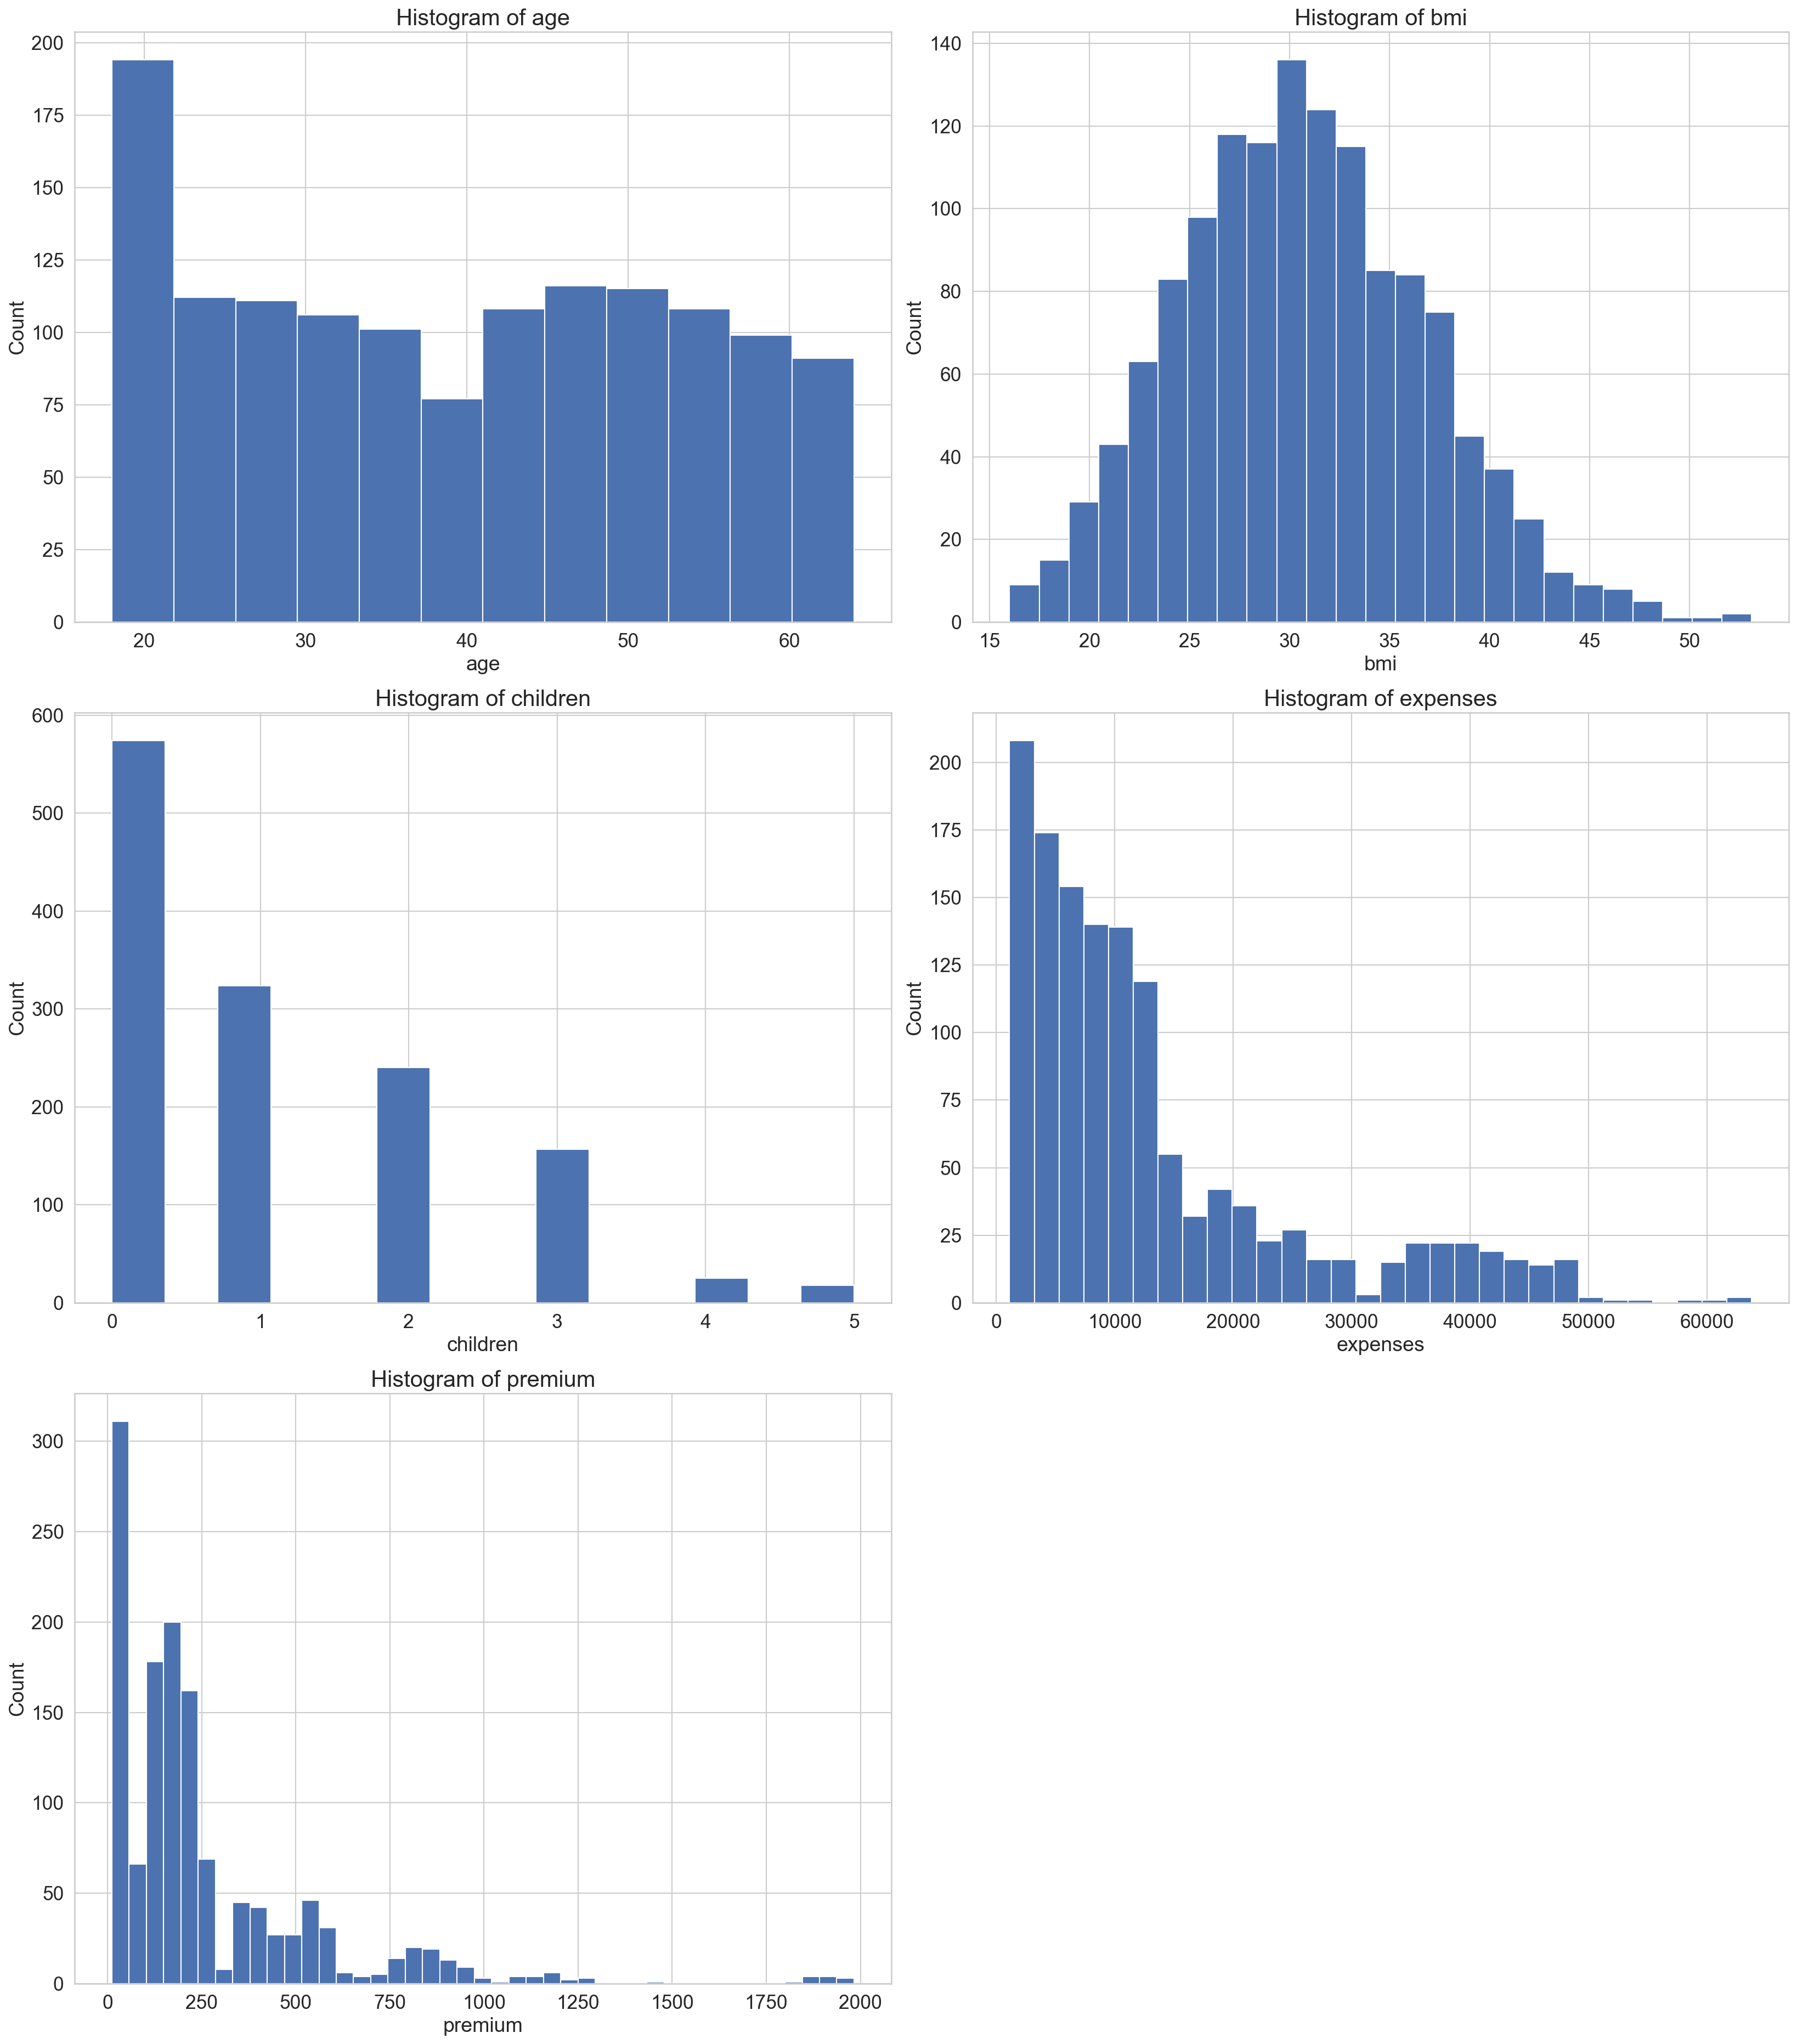

In [10]:
df_num = df.select_dtypes(include="number")

sns.set_theme(style="whitegrid", context="notebook")
fig, axes = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(22, 25),
    dpi=150
)

axes = axes.flatten()

for ax, col in zip(axes, df_num.columns):
    sns.histplot(df_num[col], bins="auto", ax=ax, alpha=1)
    ax.set_title(f"Histogram of {col}", fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel("Count", fontsize=18)
    ax.tick_params(axis="both", labelsize=17)

for ax in axes[len(df_num.columns):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


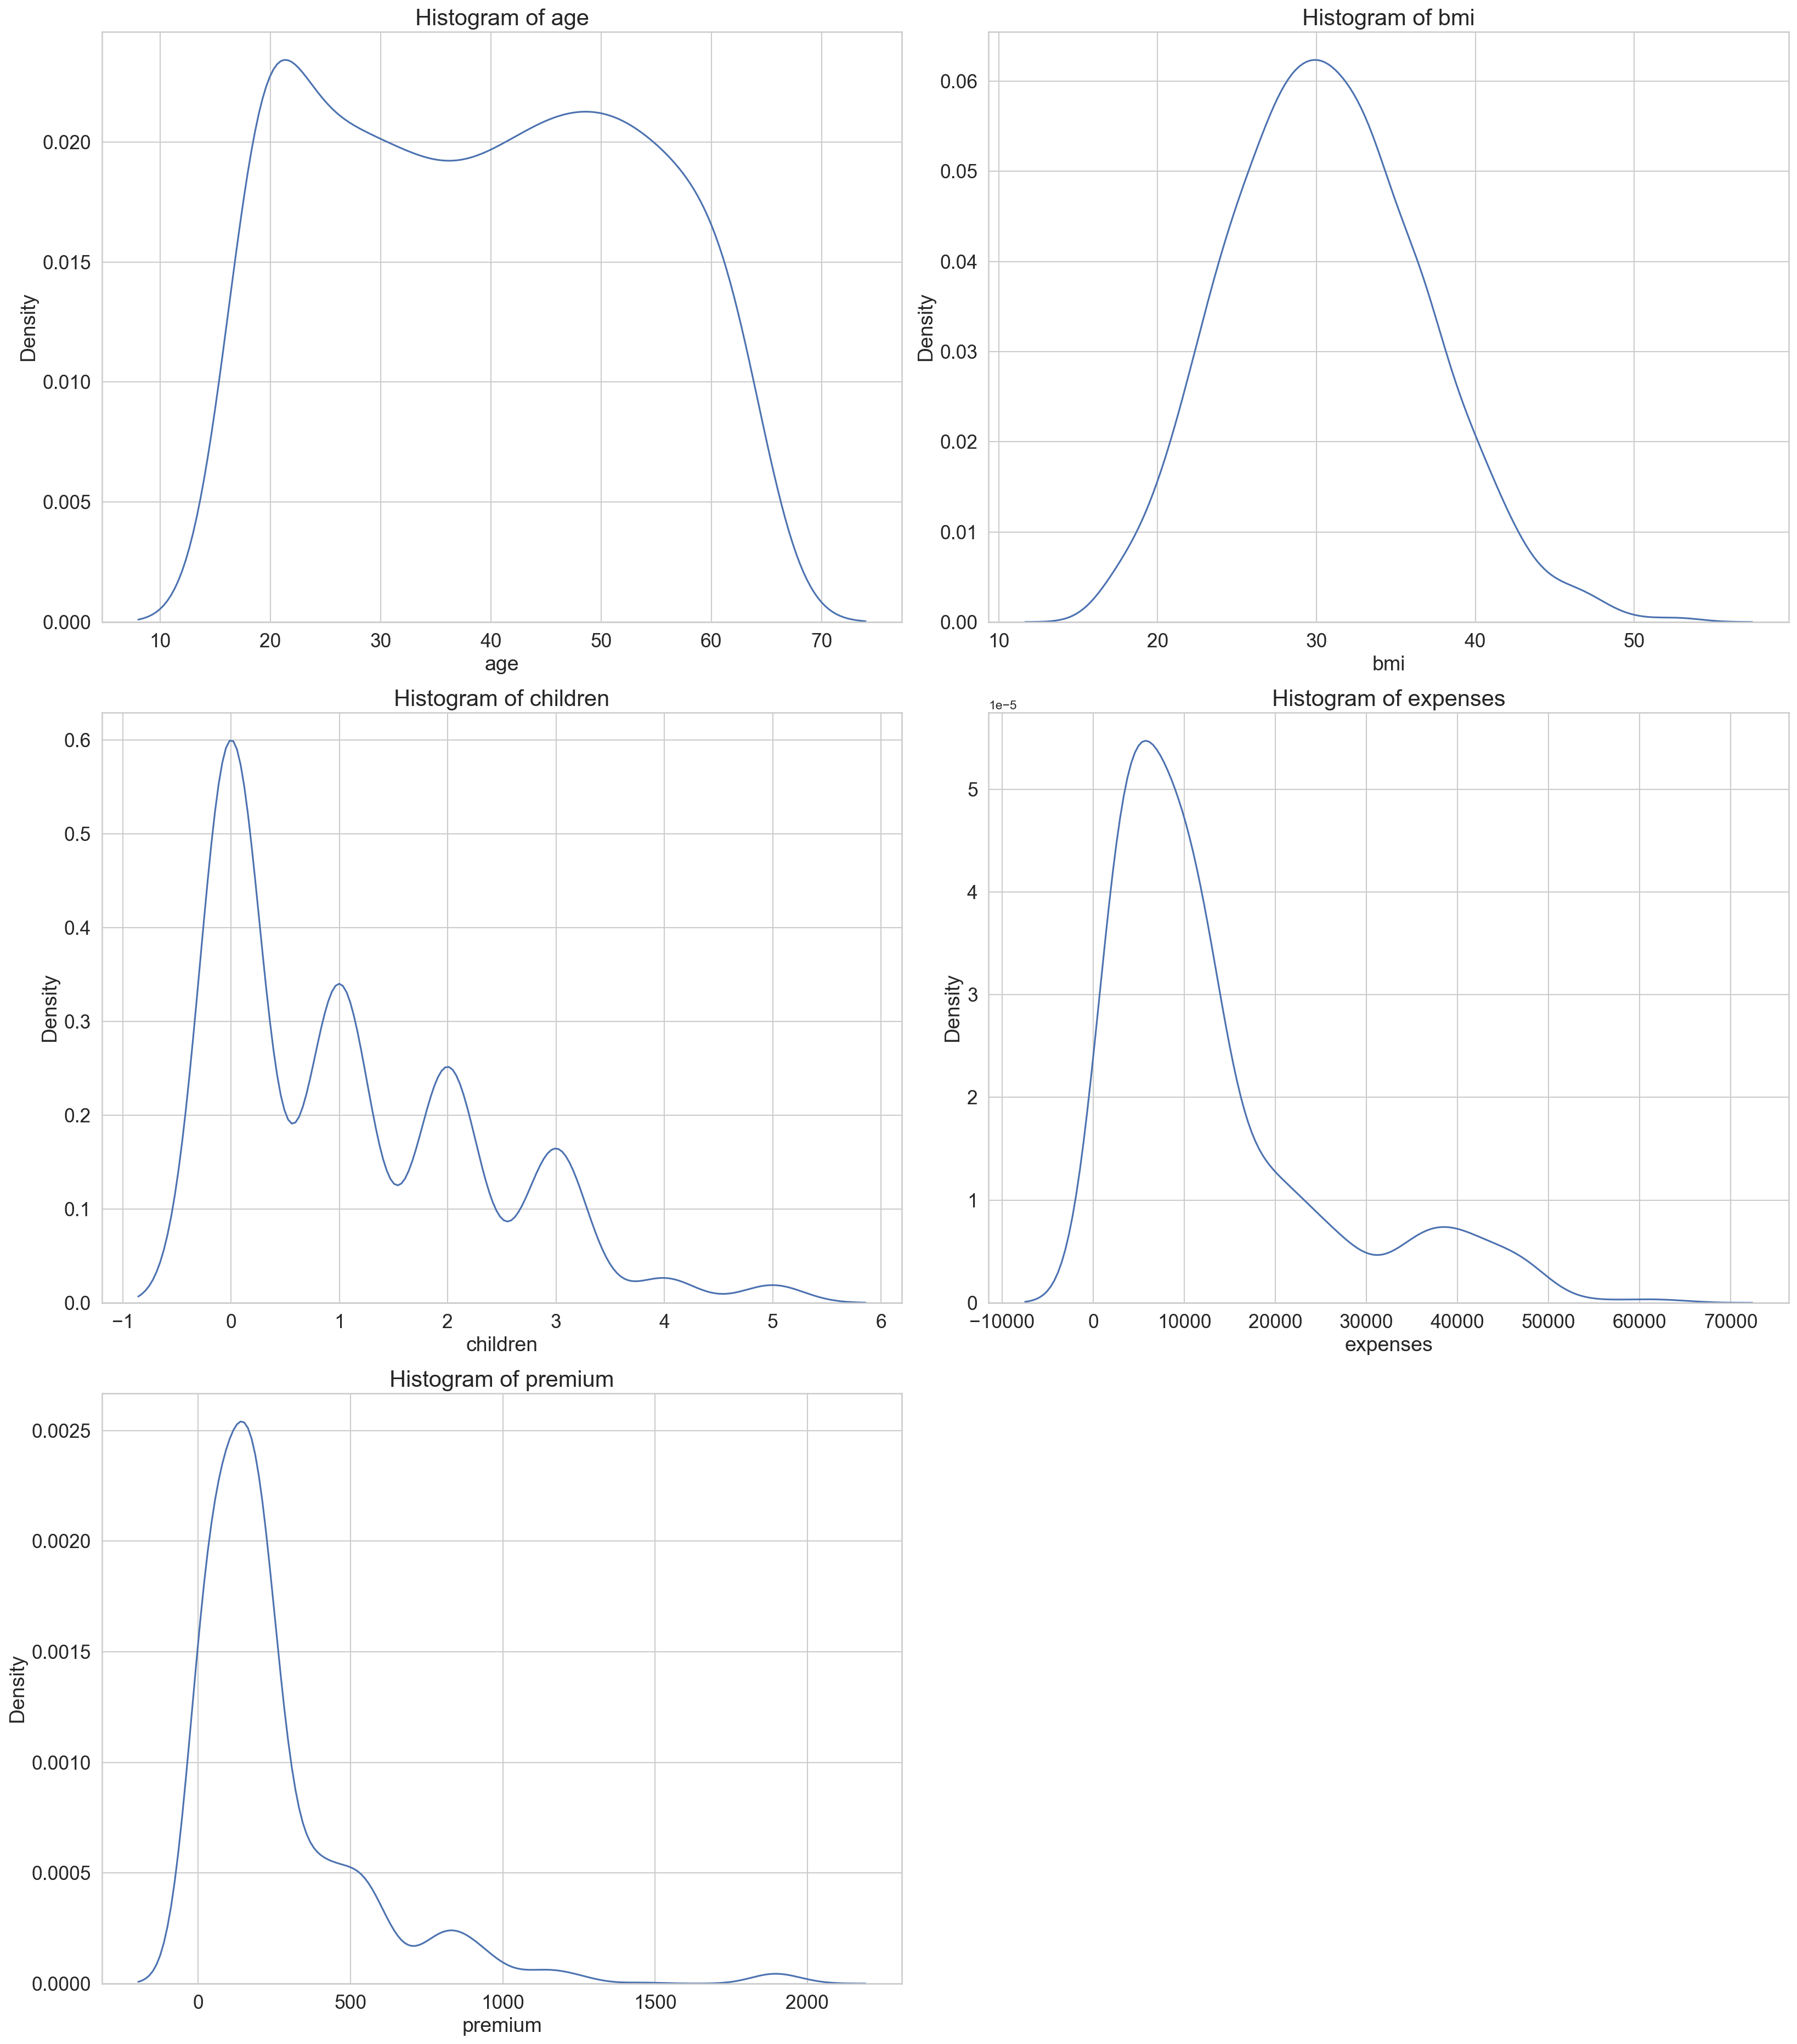

In [11]:


sns.set_theme(style="whitegrid", context="notebook")
fig, axes = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(22, 25),
    dpi=150
)

axes = axes.flatten()

for ax, col in zip(axes, df_num.columns):
    sns.kdeplot(df_num[col], ax=ax, alpha=1)
    ax.set_title(f"Histogram of {col}", fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel("Density", fontsize=18)
    ax.tick_params(axis="both", labelsize=17)

for ax in axes[len(df_num.columns):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


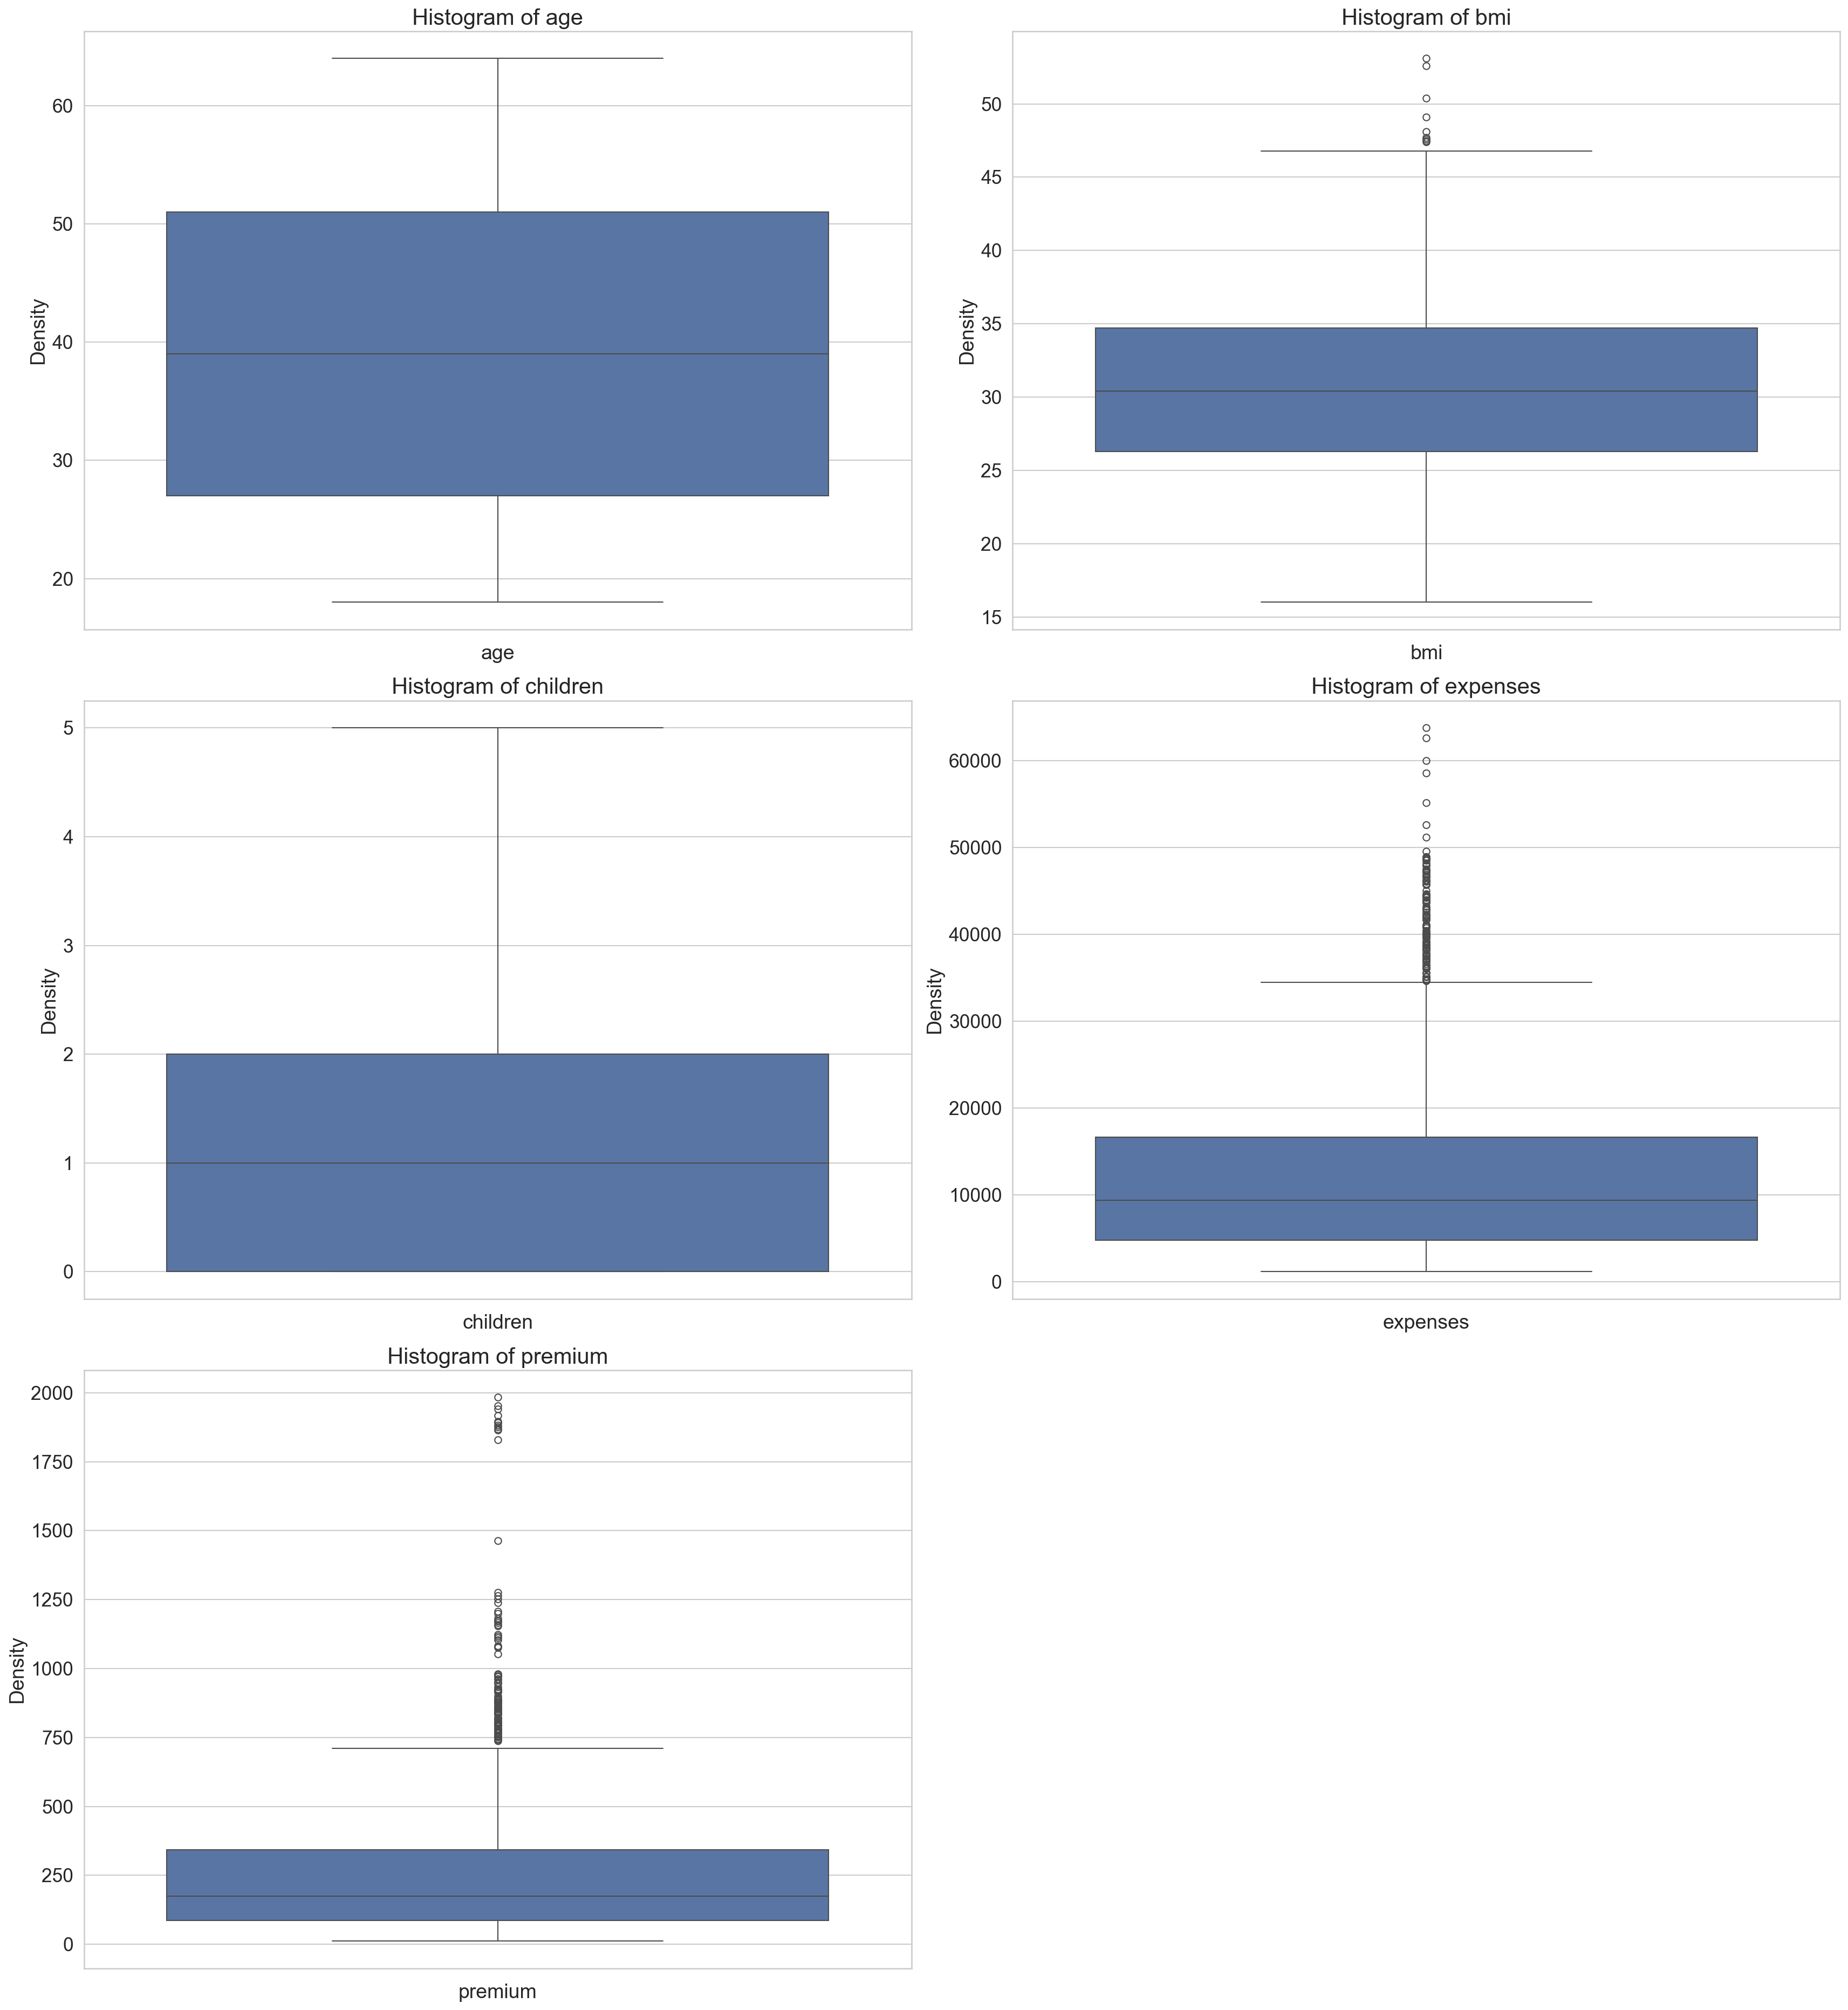

In [12]:

sns.set_theme(style="whitegrid", context="notebook")
fig, axes = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(23, 25),
    dpi=150
)

axes = axes.flatten()

for ax, col in zip(axes, df_num.columns):
    sns.boxplot(df_num[col], ax=ax)
    ax.set_title(f"Histogram of {col}", fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel("Density", fontsize=18)
    ax.tick_params(axis="both", labelsize=17)

for ax in axes[len(df_num.columns):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


### ☑️ **Summary**
---
**Histograms, box plots, and kdeplot plots of numerical columns showed that:**<br>
1. age:<br>
    - The data distribution is skewed to the right.
    - It is concentrated at the age of 20.
    - It is uniform at the rest of the ages in the graph.
    - This means that most of the people in this data are 20 years old.
    - No noise or outliers are seen.
---
2. bmi:<br>
    - The data distribution is normal.
    - The data is concentrated between 25 and 35 BMI.
    - This means that most people are in the overweight to obese range.
    - Outliers are visible (further analysis in the following graphs).
---
3. childern:<br>
    - The data distribution is skewed to the right.
    - The data is concentrated between 0 and 3 children.
    - This means that most people have no children (or are single) or have 1 to 3 children.
    - Some people have 5 or more children.
    - There are no outliers or noise in the data.
---
4. expenses:<br>
    - The data distribution is skewed to the right.
    - The data is concentrated between $0 and $20,000.
    - This means that most people have typical medical expenses.
    - Some people have $20,000 or more, which means they probably had a specific illness or major surgery, expensive medications.
    - There are outliers.
---
5. premium:
   - The data distribution is skewed to the right.
    - The data is concentrated between $0 and $250.
    - This means that most people pay a small premium.
    - Some people pay $1,000 or more, which means that it is likely influenced by smoking, region, age, and other variables (for example, people with a high BMI pay more premiums).
    - There are outliers.

**Note:**<br>

---
| Column     | Meaning                 | Who pays                    | For what         |
| ---------- | ----------------------- | --------------------------- | ---------------- |
| `premium`  | Insurance premium       | Insured (customer)          | Health coverage  |
| `expenses` | Actual medical expenses | Insurance company / patient | Medical services |


## Part 2:

Investigation of the impact of each column on the first target

---
**I will first categorize the first target values ​​(expenses),<br>
draw histogram charts and show the impact of each first target on each chart**

In [13]:
df["expenses_Level"] = pd.cut(
    x=df["expenses"],
    bins=[0, 5000, 15000, 30000, np.inf],
    labels=["Low", "Medium", "High", "Very High"],
)

Based on my Google searches:
- low expenses: The actual cost of treatment is small(0 to 5000)
- Medium expenses: The actual cost of treatment is Medium(5000 to 15000)
- High expenses: The actual cost of treatment is High(15000 to 30000)
- Very High expenses: The actual cost of treatment is High(>30000)
---
Link to further study: Classification of the actual cost of treatment:<br>
[healthcare.gov](https://www.healthcare.gov)

#### age

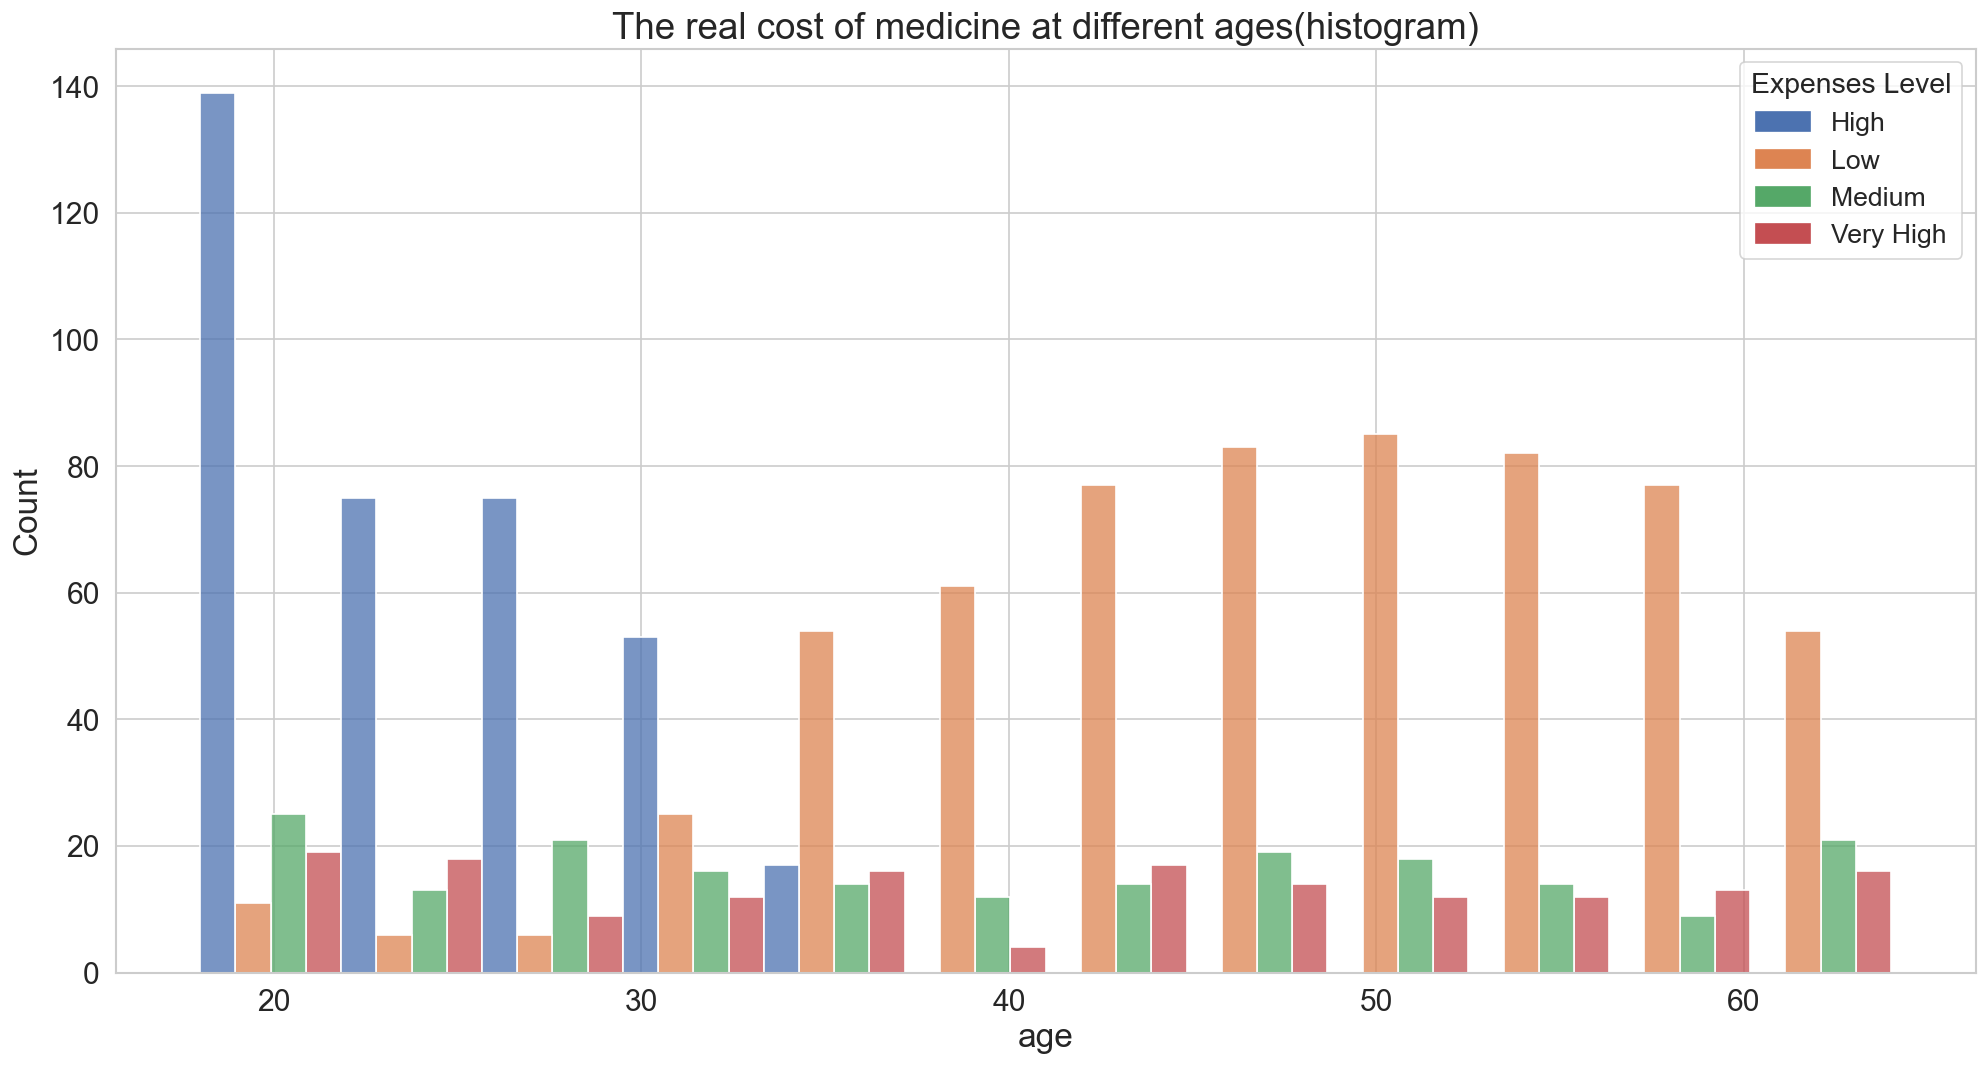

In [14]:
plt.figure(figsize=(20, 10), dpi=120)
ax = sns.histplot(
    data=df,
    x="age",
    hue="expenses_Level",
    multiple="dodge",
    fill=True,
    bins="auto",
    legend=True,
)
plt.title(label="The real cost of medicine at different ages(histogram)", fontsize=22)
plt.xlabel(xlabel="age", fontsize=20)
plt.ylabel(ylabel="Count", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
levels = df["expenses_Level"].unique()
handles = [
    plt.Rectangle((0, 0), 1, 1, color=c)
    for c in sns.color_palette(n_colors=len(levels))
]

ax.legend(handles, levels, title="Expenses Level", fontsize=16, title_fontsize=17)
plt.show()

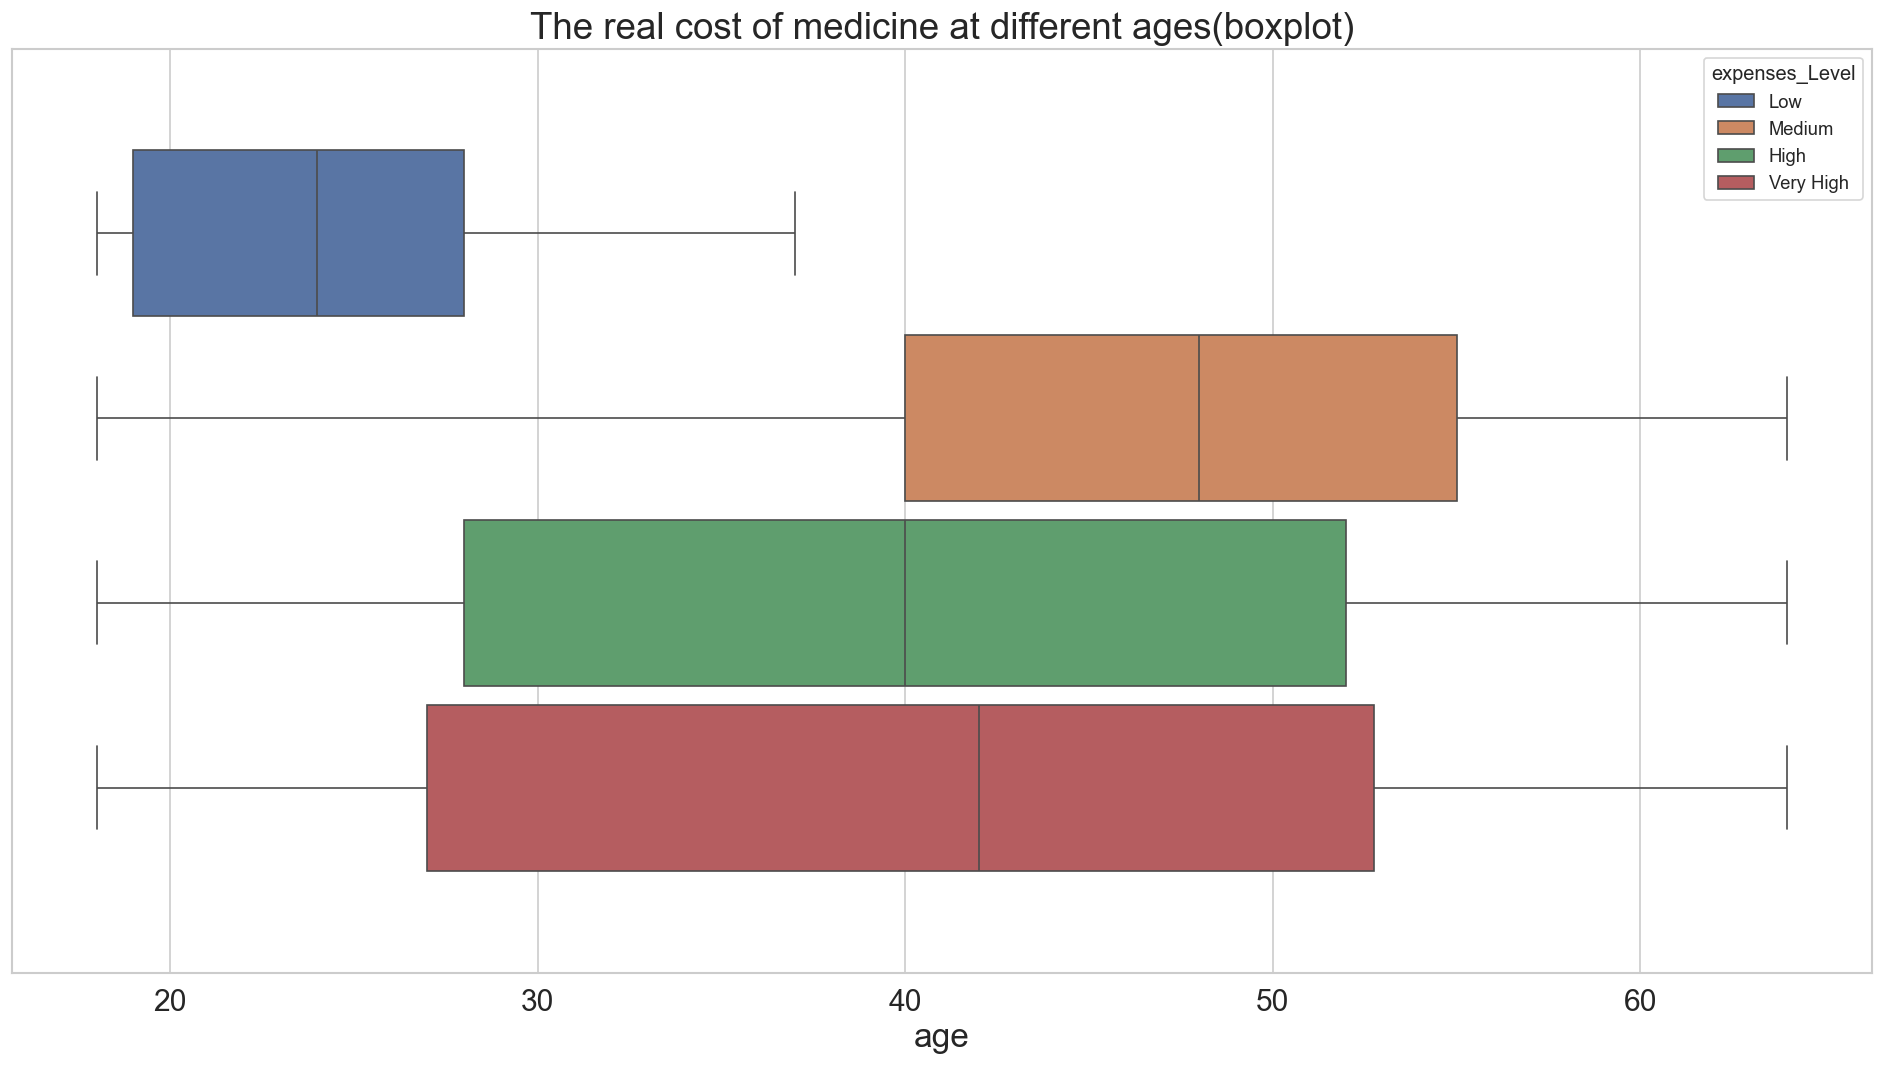

In [15]:
plt.figure(figsize=(20, 10), dpi=120)
sns.boxplot(data=df, x="age", hue="expenses_Level", gap=0.1)
plt.title(label="The real cost of medicine at different ages(boxplot)", fontsize=22)
plt.xlabel(xlabel="age", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
plt.show()

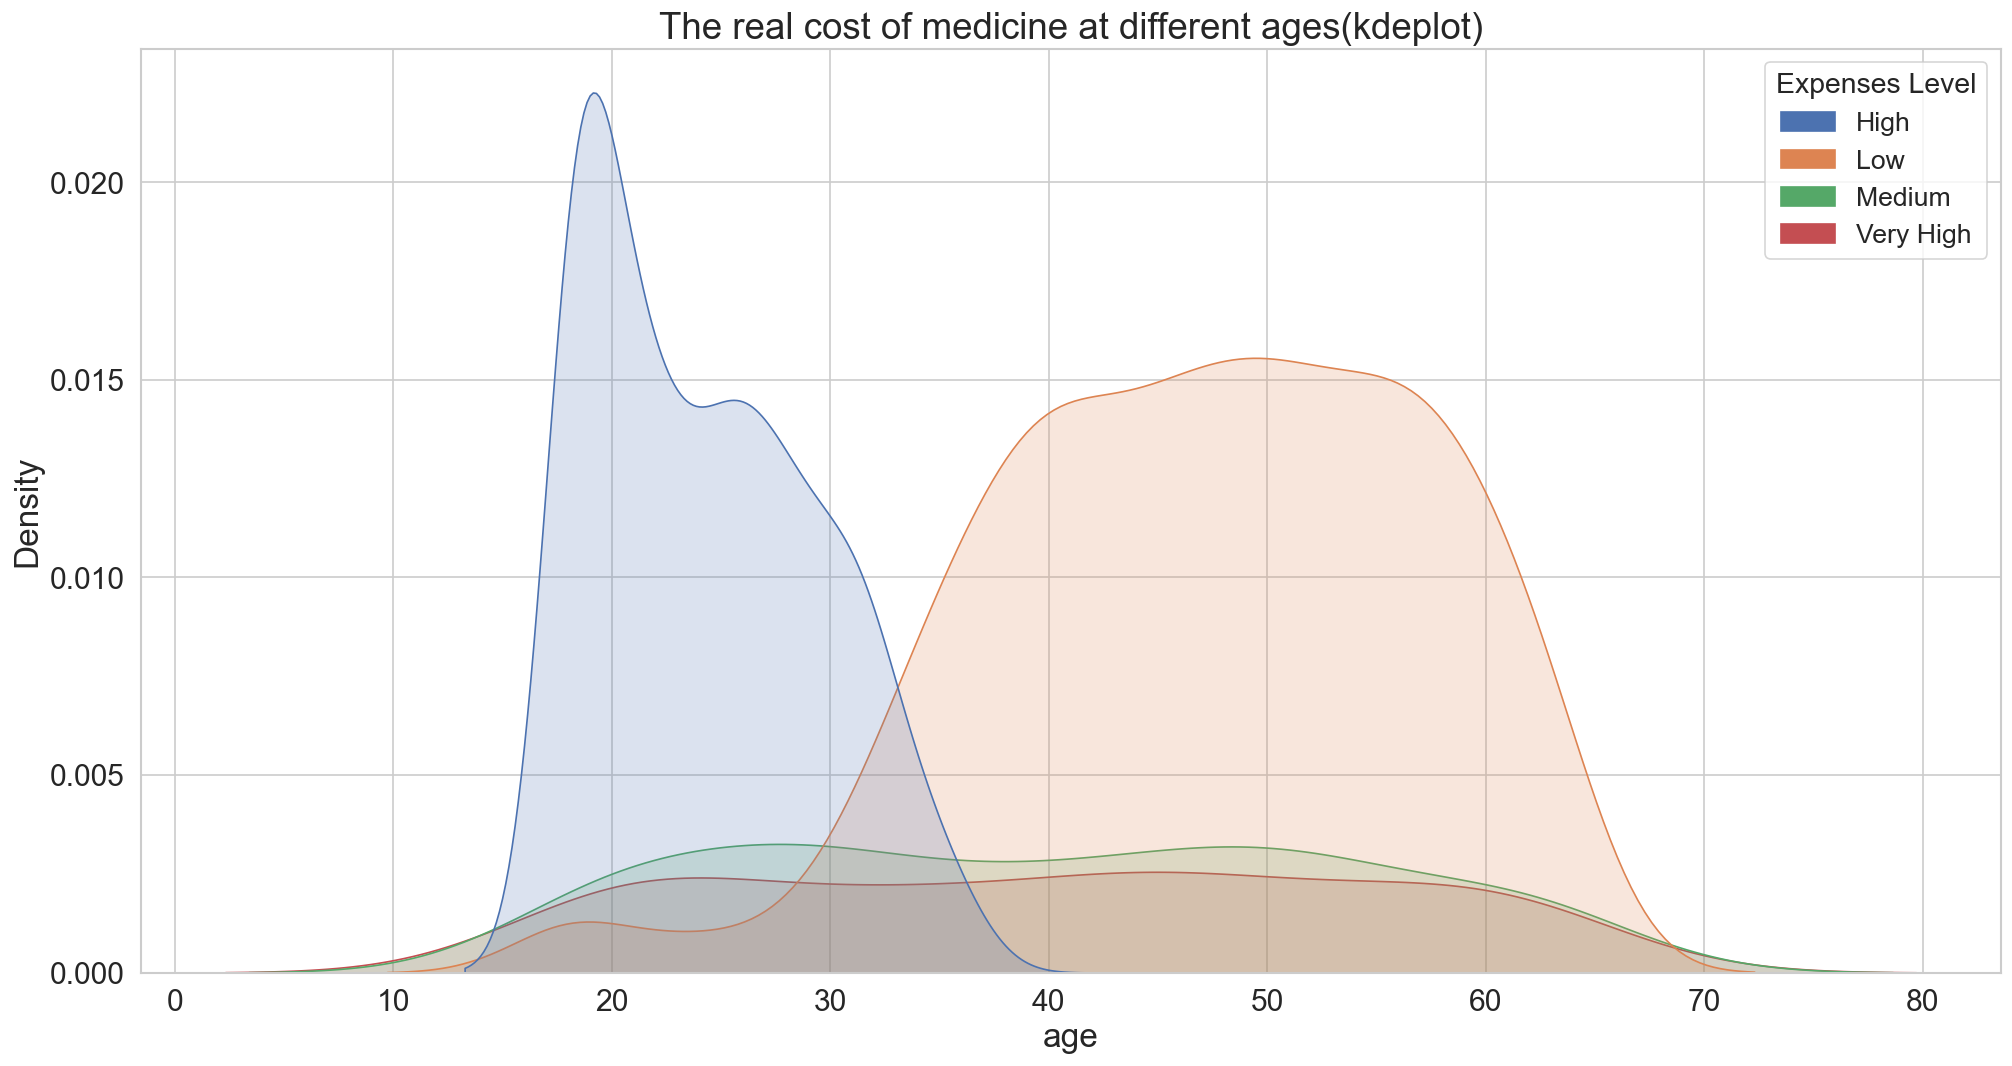

In [16]:
plt.figure(figsize=(20, 10), dpi=120)
ax = sns.kdeplot(
    data=df,
    x="age",
    hue="expenses_Level",
    legend=True,
    fill=True,
    alpha=0.2,
)
plt.title(label="The real cost of medicine at different ages(kdeplot)", fontsize=22)
plt.xlabel(xlabel="age", fontsize=20)
plt.ylabel(ylabel="Density", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
levels = df["expenses_Level"].unique()
handles = [
    plt.Rectangle((0, 0), 1, 1, color=c)
    for c in sns.color_palette(n_colors=len(levels))
]

ax.legend(handles, levels, title="Expenses Level", fontsize=16, title_fontsize=17)
plt.show()

### ☑️ Summary

---

In analyzing 3 charts, we found that:

- At younger ages between 18 and 30:
    - Actual medical costs are low, because they are healthier, have fewer specific and chronic illnesses, and take fewer medications.
- Between the ages of 30 and 40:
    - The actual cost of treatment (low) decreases and the medium begins to grow. This is because at this age, diseases such as blood pressure, blood sugar, more medical visits, and the cost of medication also increases.
- At ages 45 and up:
    - The actual cost of treating Medium reaches its maximum and High, Very High begin to show themselves, this is because in this middle to old age, they have high drug costs, their average drug consumption is on the rise.

---

**Note:**<br>
Across all ages, high, Very High is seen
This can have various reasons such as: major surgery or procedures, expensive medications, events such as: a person having an accident or an unfortunate event that caused physical injuries that increased the actual cost of treatment.

#### bmi

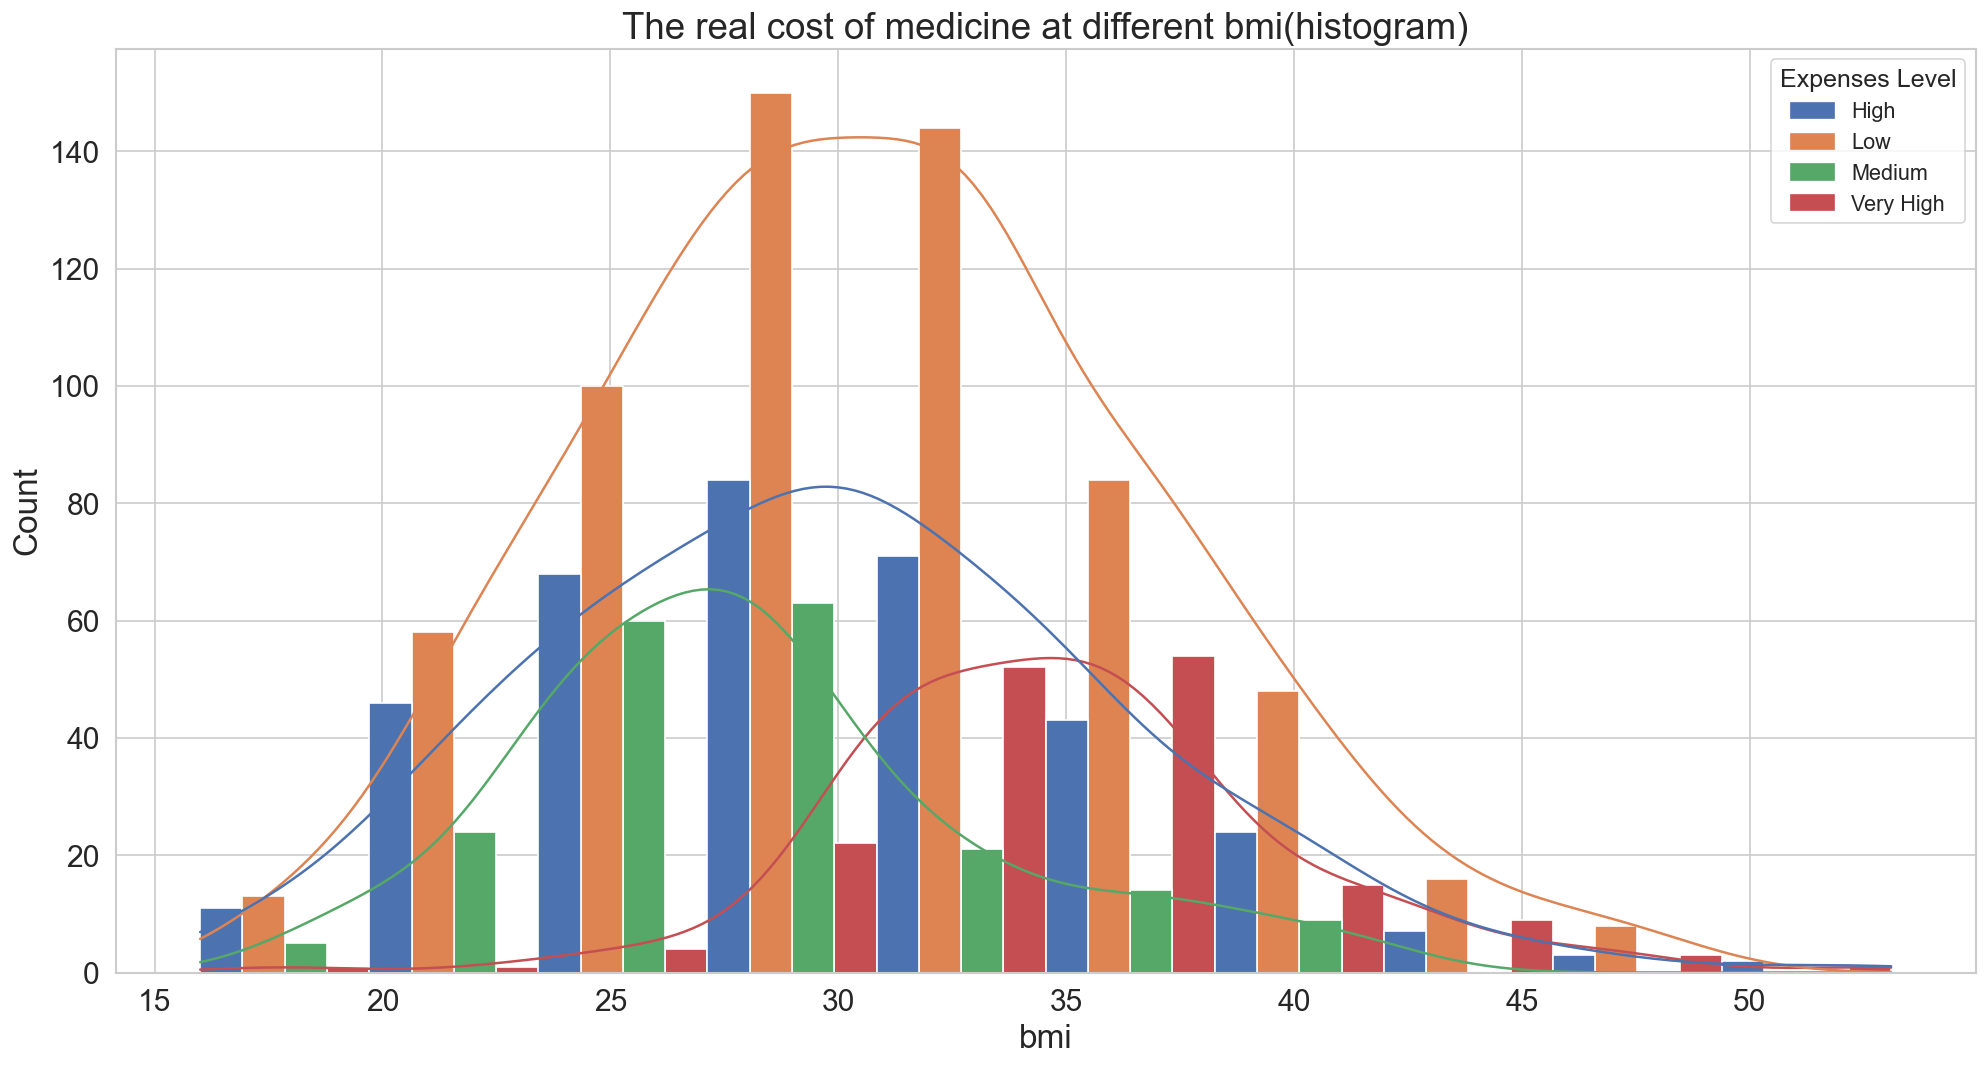

In [50]:
plt.figure(figsize=(20, 10), dpi=120)
ax = sns.histplot(
    data=df,
    x="bmi",
    hue="expenses_Level",
    fill=True,
    multiple="dodge",
    bins=10,
    legend=True,
    alpha=1,
    kde=True
)
plt.title(label="The real cost of medicine at different bmi(histogram)", fontsize=22)
plt.xlabel(xlabel="bmi", fontsize=20)
plt.ylabel(ylabel="Count", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
levels = df["expenses_Level"].unique()
handles = [
    plt.Rectangle((0, 0), 1, 1, color=c)
    for c in sns.color_palette(n_colors=len(levels))
]

ax.legend(handles, levels, title="Expenses Level", fontsize=13, title_fontsize=15)
plt.show()

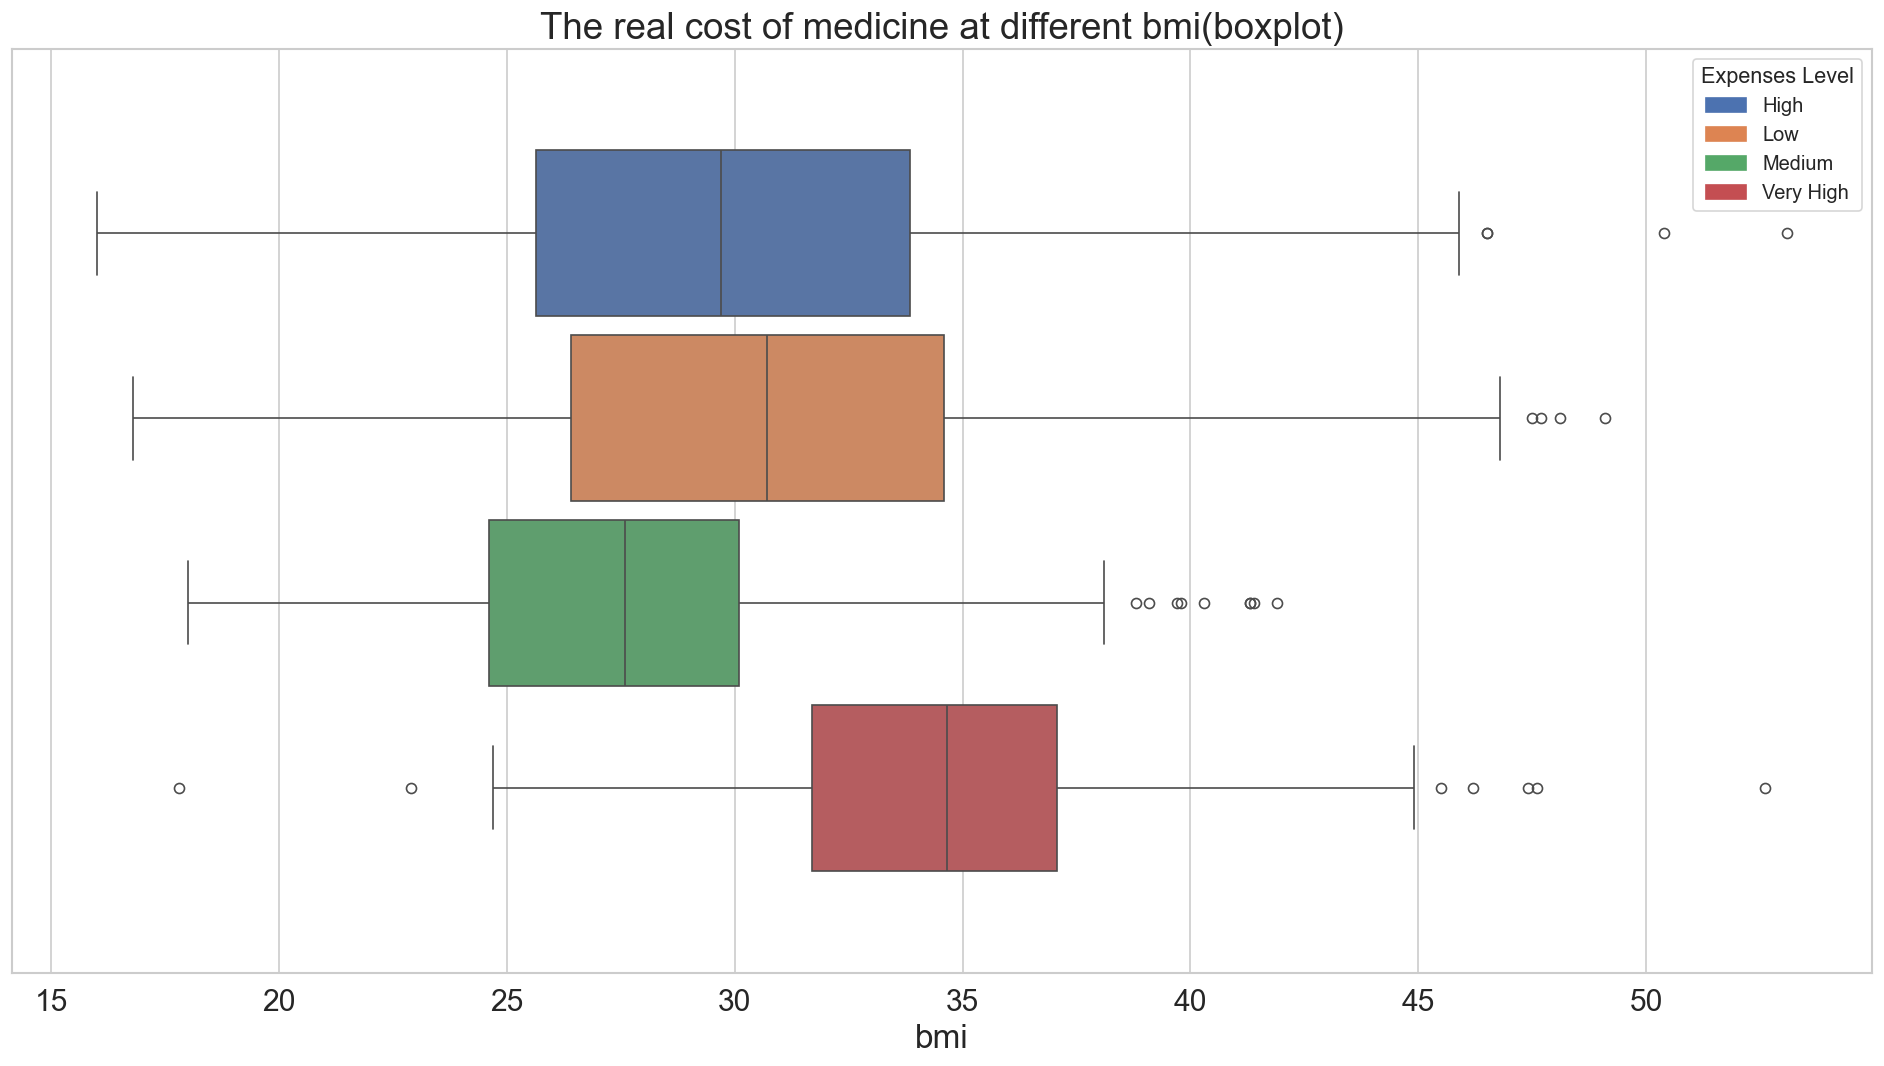

In [49]:
plt.figure(figsize=(20, 10), dpi=120)
ax = sns.boxplot(data=df, x="bmi", hue="expenses_Level", gap=0.1)
plt.title(label="The real cost of medicine at different bmi(boxplot)", fontsize=22)
plt.xlabel(xlabel="bmi", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
levels = df["expenses_Level"].unique()
handles = [
    plt.Rectangle((0, 0), 1, 1, color=c)
    for c in sns.color_palette(n_colors=len(levels))
]
ax.legend(handles, levels, title="Expenses Level", fontsize=12, title_fontsize=13)
plt.show()

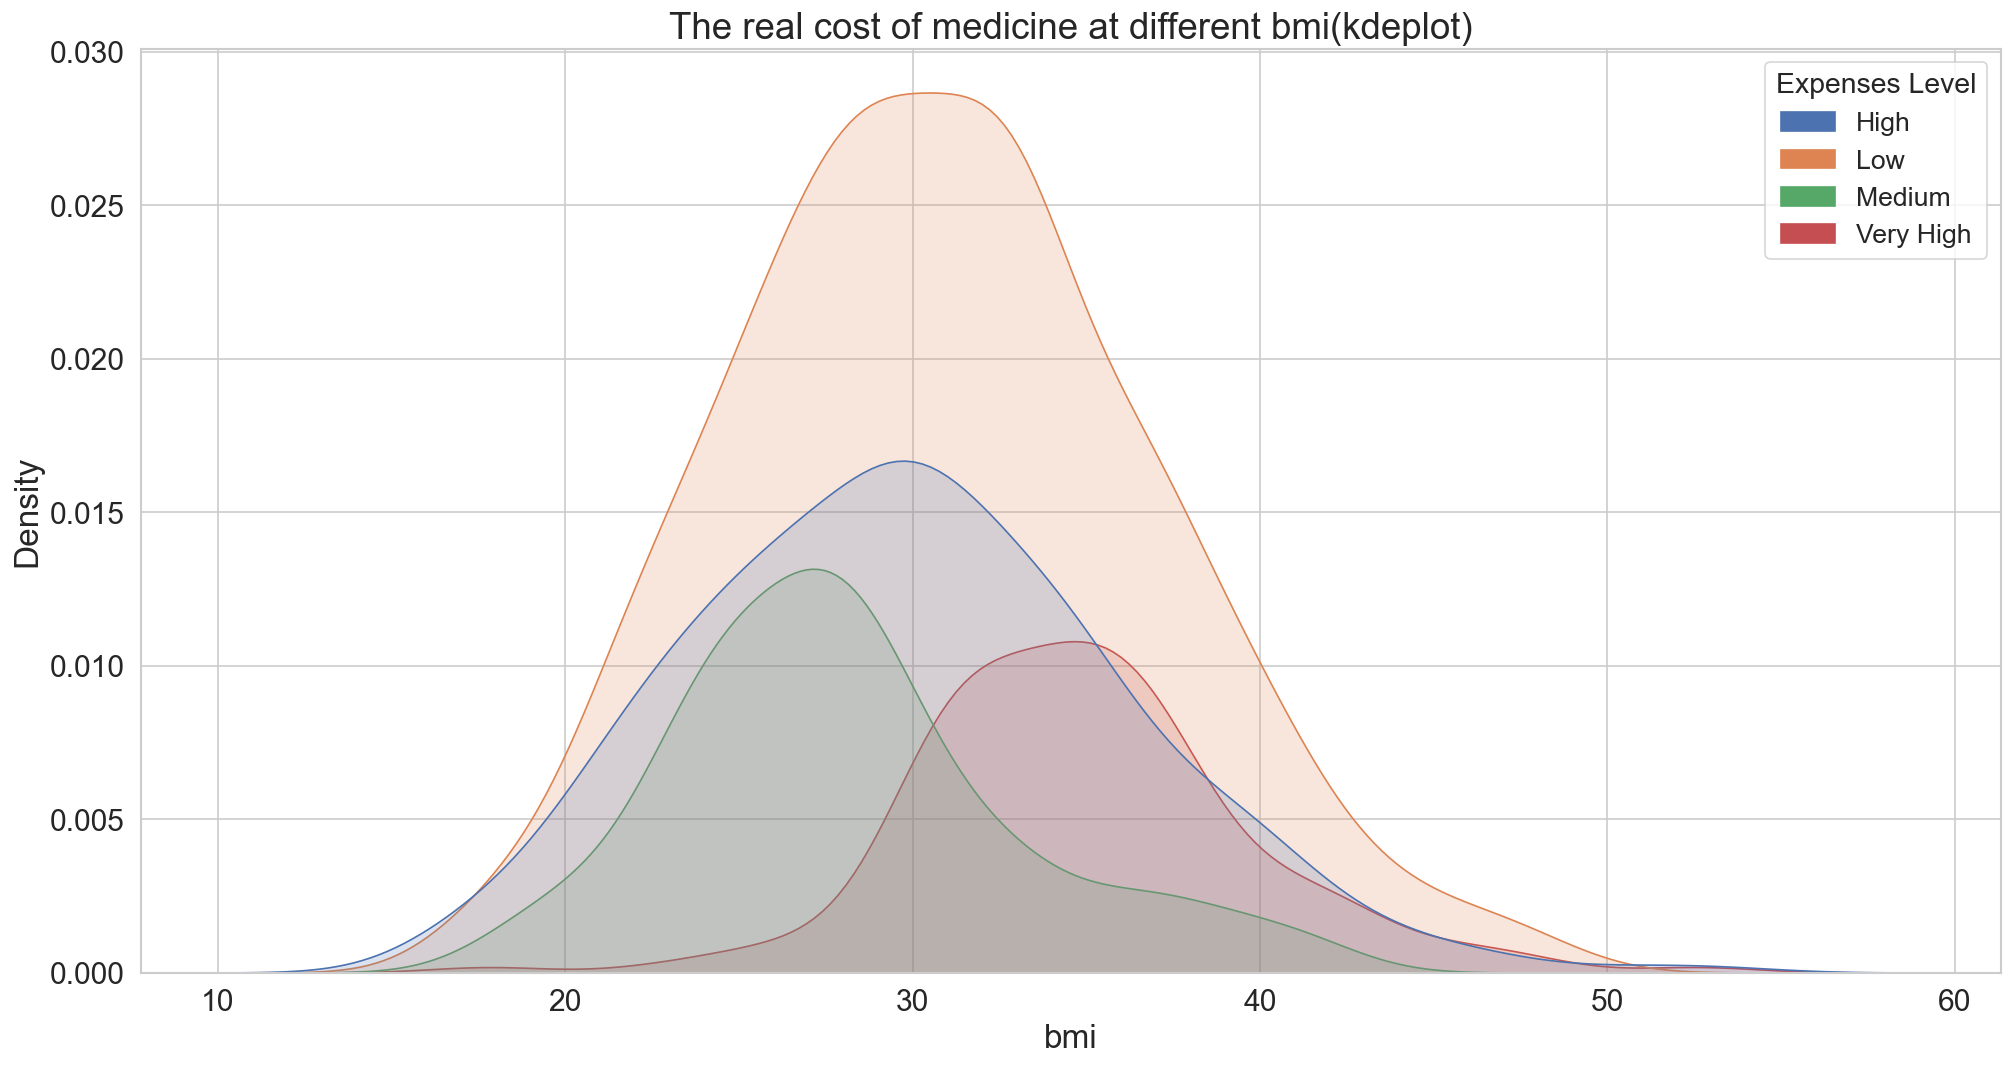

In [53]:
plt.figure(figsize=(20, 10), dpi=120)
ax = sns.kdeplot(
    data=df,
    x="bmi",
    hue="expenses_Level",
    legend=True,
    fill=True,
    alpha=0.2,
)
plt.title(label="The real cost of medicine at different bmi(kdeplot)", fontsize=22)
plt.xlabel(xlabel="bmi", fontsize=20)
plt.ylabel(ylabel="Density", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
levels = df["expenses_Level"].unique()
handles = [
    plt.Rectangle((0, 0), 1, 1, color=c)
    for c in sns.color_palette(n_colors=len(levels))
]

ax.legend(handles, levels, title="Expenses Level", fontsize=16, title_fontsize=17)
plt.show()

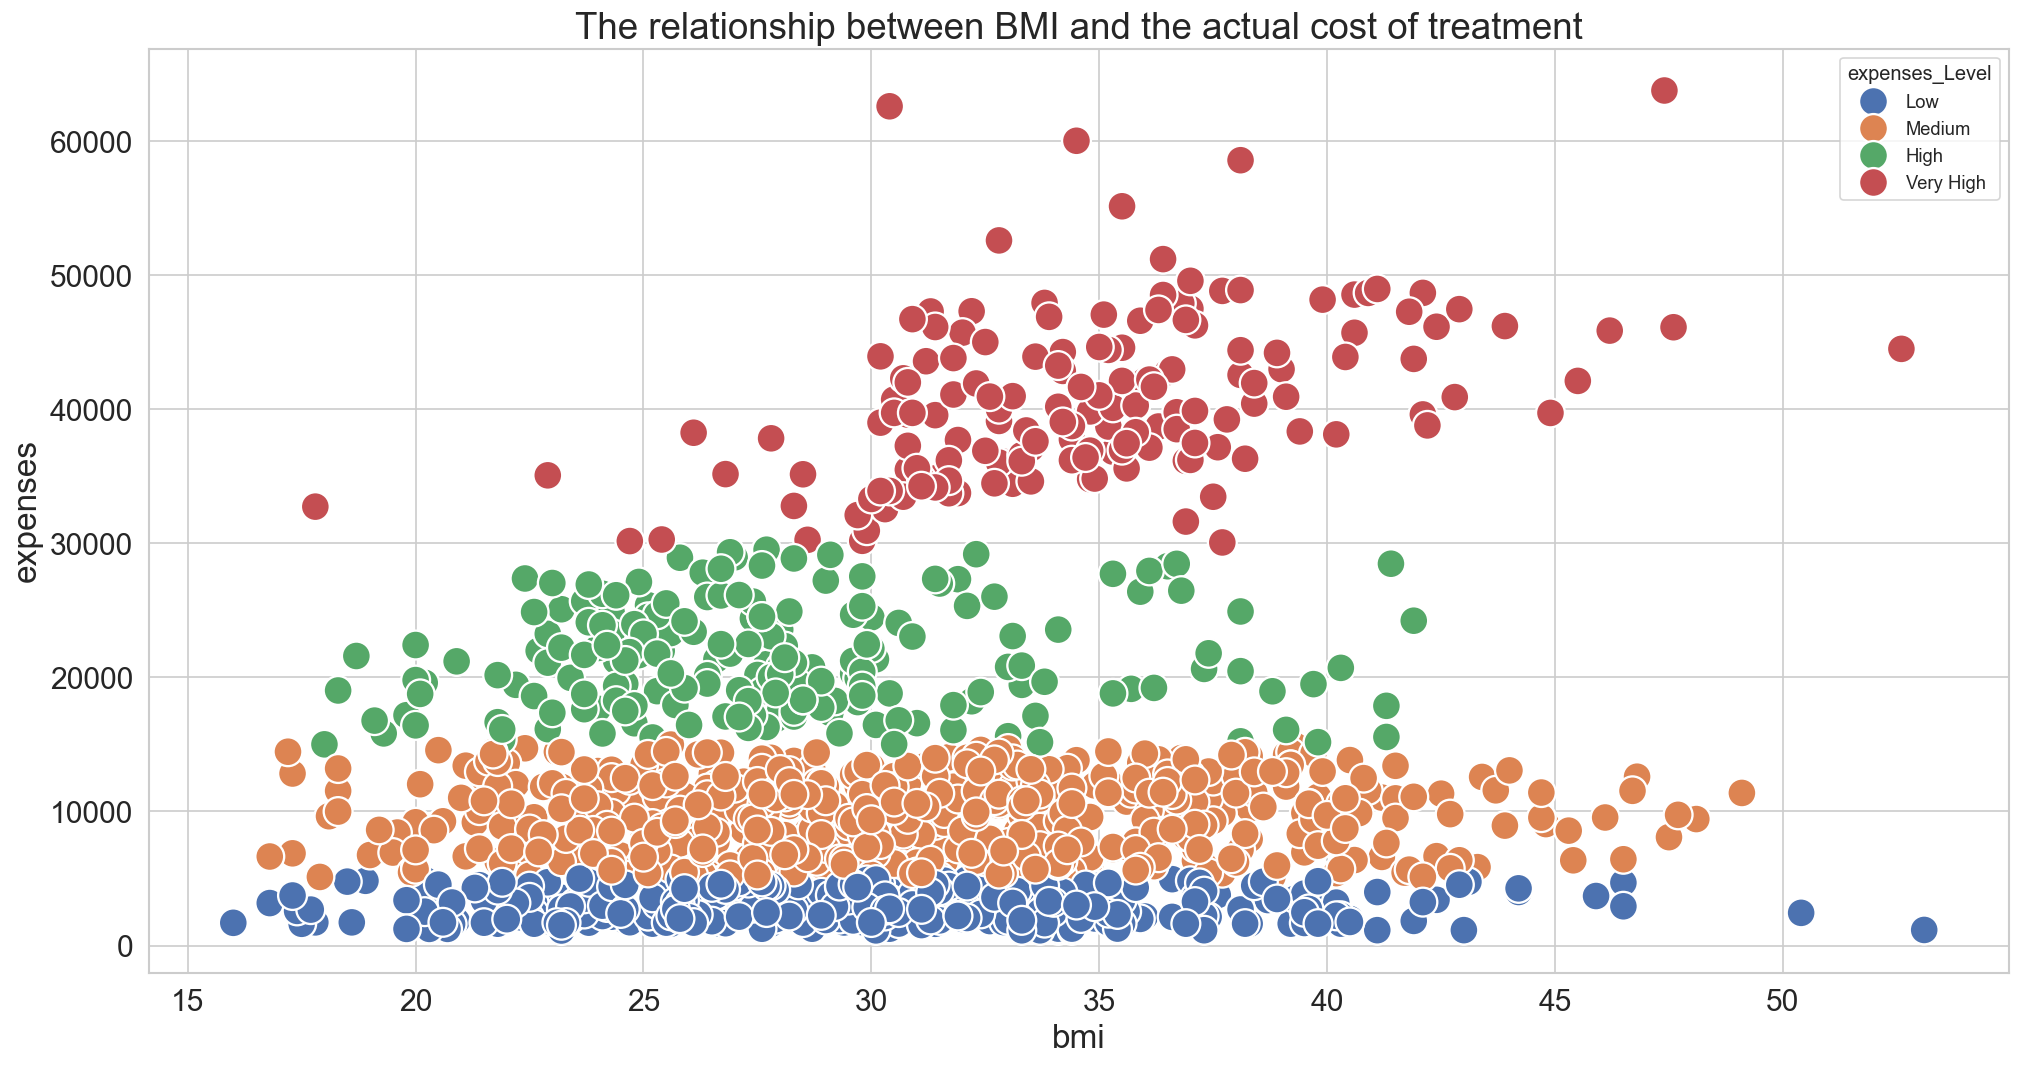

In [56]:
plt.figure(figsize=(20, 10), dpi=120)
sns.scatterplot(
    data=df,
    x="bmi",
    y="expenses",
    hue="expenses_Level",
    s=300
)
plt.title(
    label="The relationship between BMI and the actual cost of treatment",
    fontsize=22
    )
plt.xlabel(xlabel="bmi", fontsize=20)
plt.ylabel(ylabel="expenses", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
levels = df["expenses_Level"].unique()
handles = [
    plt.Rectangle((0, 0), 1, 1, color=c)
    for c in sns.color_palette(n_colors=len(levels))
]

ax.legend(handles, levels, title="Expenses Level", fontsize=18, title_fontsize=20)
plt.show()

### ☑️ Summary

---

- Big Picture:<br>
📌 As BMI increases, the likelihood of high medical expenses increases<br>
📌 At low BMIs, most people have Low/Medium expenses<br>
📌 At high BMIs, the distribution shifts towards High and Very High<br>
This means:<br>
BMI is an important and influential feature on Medical Expenses.
---
- Analyze each cost level separately:
    1. Low Expenses:
        - The highest density is between 25 and 32
        - Normal distribution
        - Even at high BMIs, the cost is still low
        - High BMI does not necessarily mean high cost, but the overall pattern is different
        - It is seen in the low outlier group
    
    2. Medium Expenses:
        - Focus on BMI ≈ 23 to 30
        - Slight shift towards higher BMI than Low
        - Severe drop after BMI ≈ 35
    3. High Expenses:
        - Main peak at BMI ≈ 28 to 35
        - Compared to Low and Medium:
            - Higher mean BMI
            - Stronger right tail

        📌 Sign of positive relationship between BMI and medical costs
    4. Very High Expenses:
        - Approximately from BMI ≈ 30 and above
        - Highest density between 33 and 40
        - A completely right-skewed distribution

        **⚠️ Important note:**<br>
        People with high BMIs are at the highest risk of very high medical costs.
---
**⚠️ Important note:**<br>
BMI alone is not sufficient to predict cost